In [44]:
import pandas as pd
import numpy as np
import tabular_data as td

In [45]:
from sklearn.linear_model import SGDRegressor
from sklearn import model_selection
from sklearn import preprocessing

In [46]:
df = pd.read_csv("tabular_data/listing.csv")
df = td.clean_tabular_data(df)
df = df.astype({"guests": "int32", "bedrooms": "int32"})

/home/nick/Documents/AICore/Specialisation/Airbnb_Project/tabular_data.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Description"] = pd.Series(description_list)


In [47]:
X, y = td.load_airbnb(df, "Price_Night")

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
X_validation, X_test, y_validation, y_test = model_selection.train_test_split(X_test, y_test, test_size=0.5)


In [48]:
X.info()
normalizer = preprocessing.MinMaxScaler().fit(X)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 987
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guests                829 non-null    int32  
 1   beds                  829 non-null    float64
 2   bathrooms             829 non-null    float64
 3   Cleanliness_rating    829 non-null    float64
 4   Accuracy_rating       829 non-null    float64
 5   Communication_rating  829 non-null    float64
 6   Location_rating       829 non-null    float64
 7   Check-in_rating       829 non-null    float64
 8   Value_rating          829 non-null    float64
 9   amenities_count       829 non-null    float64
 10  bedrooms              829 non-null    int32  
dtypes: float64(9), int32(2)
memory usage: 71.2 KB


In [49]:
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)
X_validation_normalized = normalizer.transform(X_validation)


In [8]:
print(X_train_normalized)

[[0.06666667 0.         0.1        ... 0.92307692 0.62962963 0.        ]
 [0.06666667 0.         0.1        ... 0.84615385 0.2962963  0.        ]
 [0.06666667 0.         0.1        ... 0.76923077 0.28395062 0.        ]
 ...
 [0.06666667 0.         0.1        ... 0.76923077 0.2962963  0.        ]
 [0.2        0.125      0.2        ... 0.92307692 0.67901235 0.11111111]
 [0.53333333 0.4375     0.45       ... 0.76923077 0.4691358  0.44444444]]


In [54]:
SGD_model = SGDRegressor()
SGD_model.fit(X_train_normalized, y_train)

SGDRegressor()

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

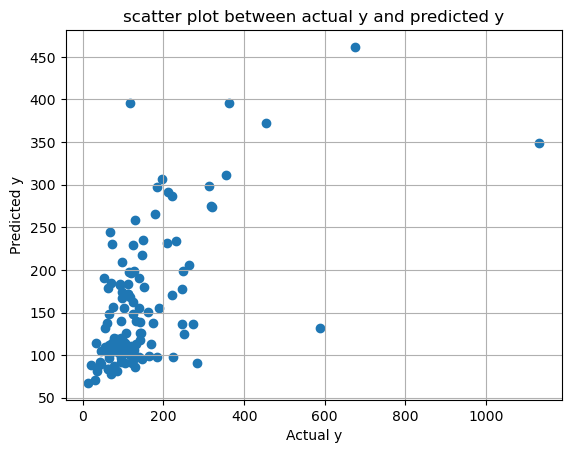

MSE:  10065.508918697436


In [57]:
plt.scatter(y_test,SGD_model.predict(X_test_normalized))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print("MSE: ", mean_squared_error(y_validation,SGD_model.predict(X_validation_normalized)))